## Import Needed Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, recall_score, classification_report
from xgboost import XGBClassifier, plot_importance

## EDA

In [2]:
df = pd.read_csv('/content/creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [3]:
# Getting some information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9965 non-null   int64  
 1   V1      9965 non-null   float64
 2   V2      9965 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 non-null   float64
 22  

In [4]:
# Getting some descriptive statistics about data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,9965.000000,9965.000000,9965.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,...,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000
mean,5934.484897,-0.241681,0.280693,0.906359,0.260247,-0.046342,0.132335,-0.071847,-0.065317,0.801220,...,-0.052099,-0.152091,-0.033426,0.021638,0.087302,0.108328,0.005614,0.003051,62.968359,0.003814
std,4449.407112,1.522695,1.308882,1.156948,1.440500,1.183634,1.307586,1.077872,1.260140,1.156424,...,0.914735,0.631310,0.488203,0.593818,0.428128,0.562661,0.411434,0.266532,184.626707,0.061641
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.000000
25%,2061.000000,-1.012157,-0.208591,0.412198,-0.615591,-0.643060,-0.630075,-0.542336,-0.190495,0.069439,...,-0.268191,-0.548412,-0.174222,-0.327438,-0.157704,-0.328193,-0.084489,-0.015751,5.000000,0.000000
50%,4547.000000,-0.372624,0.286179,0.943149,0.218492,-0.153090,-0.153577,-0.054658,0.012466,0.804930,...,-0.123101,-0.136078,-0.046009,0.079935,0.121180,0.043395,-0.004505,0.015904,15.950000,0.000000
75%,10163.000000,1.151506,0.900823,1.601871,1.119367,0.371762,0.503376,0.476280,0.273016,1.506066,...,0.032707,0.247913,0.081288,0.410877,0.359418,0.478249,0.121045,0.077418,50.792500,0.000000
max,14864.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


## Checking Missing Data

In [5]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,V15,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V9,V8,V7,V6,V5,V4,V3,V1,V2,Time
Total,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0
Percent,0.010035,0.010035,0.010035,0.010035,0.010035,0.010035,0.010035,0.010035,0.010035,0.010035,...,0.010035,0.010035,0.010035,0.010035,0.010035,0.010035,0.010035,0.0,0.0,0.0


## Checking Duplicates

In [6]:
duplicated_values = df[df.duplicated()]
print(duplicated_values)

       Time        V1        V2        V3        V4        V5        V6  \
33       26 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35       26 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113      74  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114      74  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115      74  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
221     145 -2.420413  1.947885  0.553646  0.983069 -0.281518  2.408958   
223     145 -2.419486  1.949346  0.552998  0.982710 -0.284815  2.411200   
1178    919  0.904289 -0.538055  0.396058  0.500680 -0.864473 -0.657199   
1180    919  1.207596 -0.036860  0.572104  0.373148 -0.709633 -0.713698   
1382   1074 -2.248488 -0.195670  0.026949 -0.525780 -0.238759 -0.033359   
1384   1074 -2.445204 -0.505494  0.164511 -0.449658  0.460784 -0.509035   
1684   1308 -1.322313  0.863591  1.844234  1.089375  0.771005  0.152191   
1686   1308 -1.379848  0.

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
# the dupliccates are all removed

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9923 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9923 non-null   int64  
 1   V1      9923 non-null   float64
 2   V2      9923 non-null   float64
 3   V3      9922 non-null   float64
 4   V4      9922 non-null   float64
 5   V5      9922 non-null   float64
 6   V6      9922 non-null   float64
 7   V7      9922 non-null   float64
 8   V8      9922 non-null   float64
 9   V9      9922 non-null   float64
 10  V10     9922 non-null   float64
 11  V11     9922 non-null   float64
 12  V12     9922 non-null   float64
 13  V13     9922 non-null   float64
 14  V14     9922 non-null   float64
 15  V15     9922 non-null   float64
 16  V16     9922 non-null   float64
 17  V17     9922 non-null   float64
 18  V18     9922 non-null   float64
 19  V19     9922 non-null   float64
 20  V20     9922 non-null   float64
 21  V21     9922 non-null   float64
 22  V22  

## Showing Fraud Results

In [9]:
df['Class'].value_counts()

Class
0.0    9884
1.0      38
Name: count, dtype: int64

In [10]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.61 % of the dataset
Frauds 0.38 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

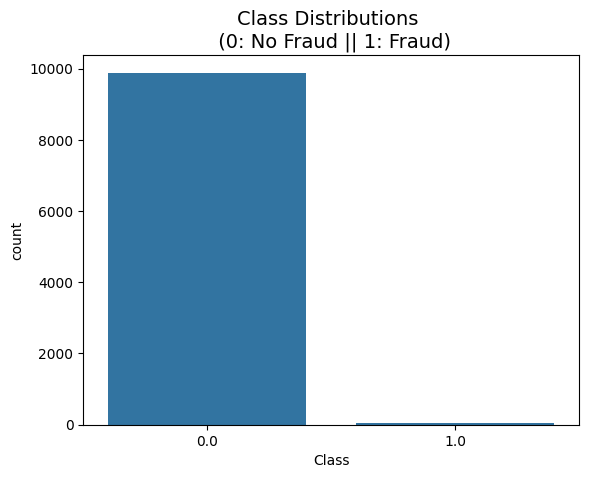

In [11]:
sns.countplot(x='Class',data = df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

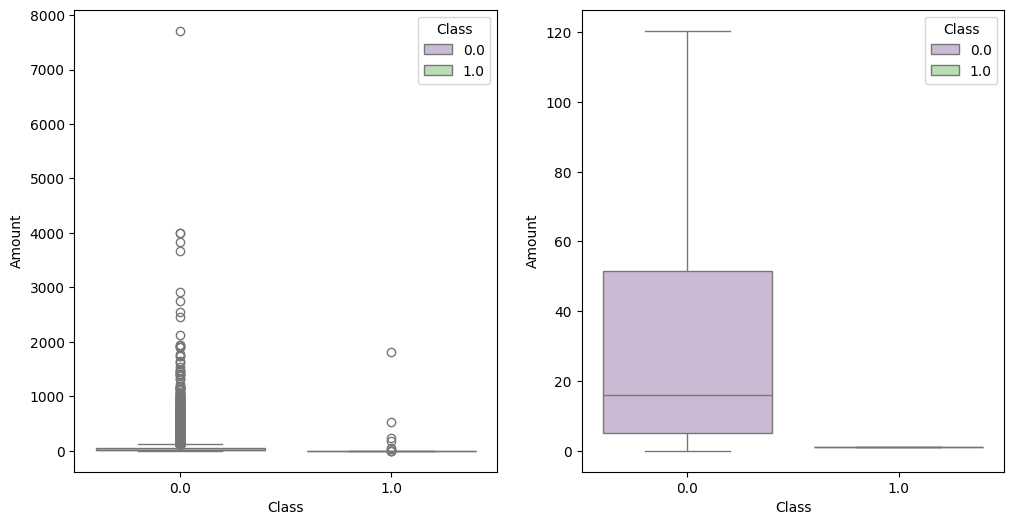

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

In [13]:
tmp = df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    9884.000000
mean       63.104096
std       184.397018
min         0.000000
25%         5.217500
50%        15.950000
75%        51.500000
max      7712.430000
Name: Amount, dtype: float64

In [14]:
class_1.describe()

count      38.000000
mean       75.730526
std       304.521215
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

#### The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.

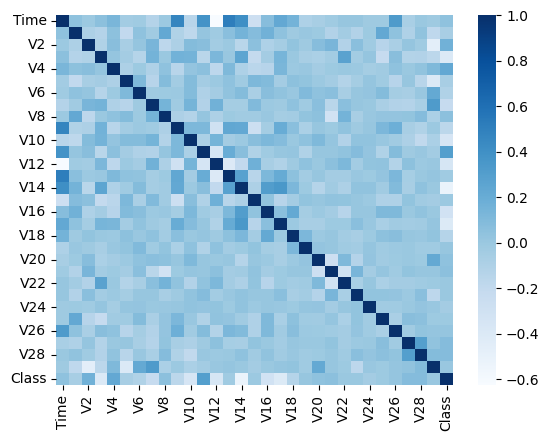

In [15]:
dataplot = sns.heatmap(df.corr(), cmap="Blues")
plt.show()

### Model Training

In [16]:
x = df.drop('Class', axis='columns')
y = df['Class']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

#### Logistic Regression

In [18]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
from sklearn.metrics import classification_report

# Drop NaN values from both training and test data while ensuring consistency between features and labels
x_train_clean = x_train.dropna()
y_train_clean = y_train.loc[x_train_clean.index]
x_test_clean = x_test.dropna()
y_test_clean = y_test.loc[x_test_clean.index]

# Train your logistic regression model on the cleaned training data
lr_model.fit(x_train_clean, y_train_clean)

# Make predictions on the cleaned test data
y_predicted = lr_model.predict(x_test_clean)

# Print classification report
print(classification_report(y_test_clean, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1975
         1.0       1.00      0.89      0.94         9

    accuracy                           1.00      1984
   macro avg       1.00      0.94      0.97      1984
weighted avg       1.00      1.00      1.00      1984



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.metrics import confusion_matrix

# Ensure y_test_clean and y_predicted have the same length
y_test_clean = y_test_clean[:len(y_predicted)]

# Calculate confusion matrix
confusion = confusion_matrix(y_test_clean, y_predicted)
print(confusion)

[[1975    0]
 [   1    8]]


<Axes: >

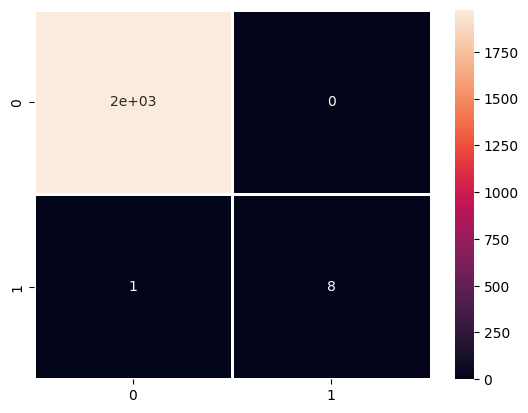

In [21]:
sns.heatmap(confusion, annot=True, linecolor='white', linewidths=1)

### XGBoost Classifier

In [22]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
import numpy as np
from sklearn.metrics import classification_report

# Find indices of NaN values in y_test
nan_indices = np.isnan(y_test)

# Remove rows with NaN values from both x_test and y_test
x_test_clean = x_test[~nan_indices]
y_test_clean = y_test[~nan_indices]

# Make predictions on the cleaned test data
y_pred = xgb.predict(x_test_clean)

# Print classification report
print(classification_report(y_test_clean, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1975
         1.0       1.00      1.00      1.00         9

    accuracy                           1.00      1984
   macro avg       1.00      1.00      1.00      1984
weighted avg       1.00      1.00      1.00      1984



In [24]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

# Reset indices of x_test_clean and y_test_clean
x_test_clean_reset = x_test_clean.reset_index(drop=True)
y_test_clean_reset = y_test_clean.reset_index(drop=True)

# Combine x_test_clean_reset and y_test_clean_reset into a single DataFrame
test_data = pd.concat([x_test_clean_reset, y_test_clean_reset], axis=1)

# Remove rows with NaN values from test_data
test_data_filtered = test_data.dropna()

# Split test_data_filtered back into x_test_clean_filtered and y_test_clean_filtered
x_test_clean_filtered = test_data_filtered.drop(columns=[y_test_clean_reset.name])
y_test_clean_filtered = test_data_filtered[y_test_clean_reset.name]

# Make predictions on the cleaned test data
y_pred = xgb.predict(x_test_clean_filtered)

# Calculate confusion matrix
confusion_m = confusion_matrix(y_test_clean_filtered, y_pred)
print(confusion_m)

[[1975    0]
 [   0    9]]


<Axes: >

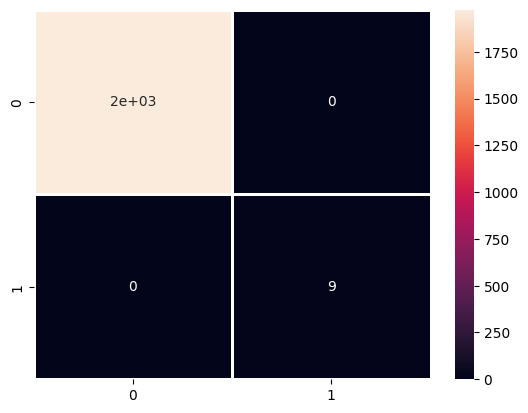

In [25]:
sns.heatmap(confusion_m, annot=True, linecolor='white', linewidths=1)

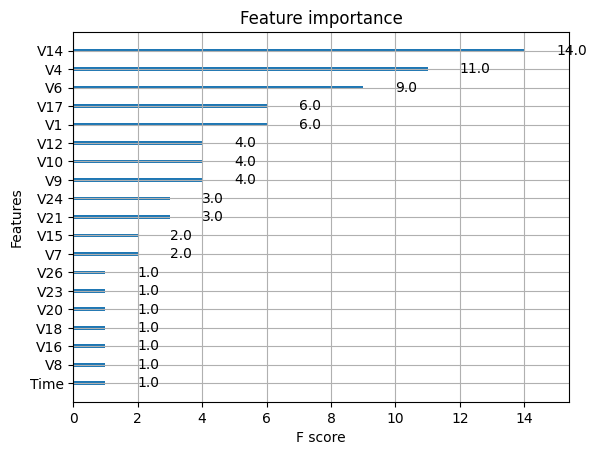

In [26]:
plot_importance(xgb)
plt.show()